<a href="https://colab.research.google.com/github/oektomo/KelasRLG2/blob/master/QLFrozenLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Created on Wed Mar 13 00:58:25 2019

@author: tawehbeysolow
mod by otm for RL-teams in OFA 
"""
import os, time, gym, numpy as np

#Parameters
learning_rate = 1e-2 #0,02
gamma = 0.96
epsilon = 0.9 # 
n_episodes = 10000 # training episode
reward_training = []
max_steps = 100
#environment = gym.make('FrozenLake-v0', is_slippery=False)
environment = gym.make('FrozenLake-v0')
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n))
Q_sa = []
stateQ = 14
actionQ = 2

In [ ]:
Q_matrix

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
Q_sa

[]

In [ ]:
def choose_action(state):
    '''
    To be used after Q table has been updated, returns an action
    
    Parameters:
        
        state - int - the current state of the agent 
        
    :return: int
    '''   
    return np.argmax(Q_matrix[state, :])

In [ ]:
def exploit_explore(prior_state, epsilon=epsilon, Q_matrix=Q_matrix):    
    '''
    One half of the exploit-explore paradigm that we will utilize 
    
    Parameters 
        
        prior_state - int  - the prior state of the environment at a given iteration
        epsilon - float - parameter that we use to determine whether we will try a new or current best action 
        
    :return: int
    '''
    
    if np.random.uniform(0, 1) < epsilon: # choose random action
        return environment.action_space.sample()
    else: # choose the best value
        return np.argmax(Q_matrix[prior_state, :])

In [ ]:
def update_q_matrix(prior_state, observation , reward, action):
    '''
    Algorithm that updates the values in the Q table to reflect knowledge acquired by the agent 
    
    Parameters 
    
        prior_state - int  - the prior state of the environment before the current timestemp
        observation - int  - the current state of the environment
        reward - int - the reward yielded from the environment after an action 
        action - int - the action suggested by the epsilon greedy algorithm 
        
    :return: None
    '''
    
    prediction = Q_matrix[prior_state, action]
    actual_label = reward + gamma * np.max(Q_matrix[observation, :])
    Q_matrix[prior_state, action] = Q_matrix[prior_state, action] + learning_rate*(actual_label - prediction)
    if(prior_state == stateQ):
      Q_sa.append(Q_matrix[stateQ, actionQ])
    

In [ ]:
def populate_q_matrix(render=False, n_episodes=n_episodes):
    '''
    Directly implementing Q Learning (Greedy Epsilon) on the Frozen Lake Game
    This function populations the empty Q matrix 
    Parameters 
    
        prior_state - int  - the prior state of the environment before the current timestemp
        observation - int  - the current state of the environment
        reward - int - the reward yielded from the environment after an action 
        action - int - the action suggested by the epsilon greedy algorithm 
        
    :return: None
    '''    
    
    for episode in range(n_episodes):
        prior_state = environment.reset()
        _ = 0
        
        while _ < max_steps:
            
            if render == True: environment.render()
            action = exploit_explore(prior_state)  
            observation, reward, done, info = environment.step(action)      
            
            update_q_matrix(prior_state=prior_state, 
                            observation=observation, 
                            reward=reward, 
                            action=action)
            
            prior_state = observation
            _ += 1
            
            if done:
                reward_training.append(reward)
                break

In [ ]:
def play_frozen_lake(n_episodes):
    
    '''
    Directly implementing Q Learning (Greedy Epsilon) on the Frozen Lake Game
    This function uses the already populated Q Matrix and displays the game being used
    
    Parameters 
    
        prior_state - int  - the prior state of the environment before the current timestemp
        observation - int  - the current state of the environment
        reward - int - the reward yielded from the environment after an action 
        action - int - the action suggested by the epsilon greedy algorithm 
        
    :return: None
    '''        
    
    lost = 0
    won = 0
    for episode in range(n_episodes):
        #print('Episode: %s'%(episode+1))
        prior_state = environment.reset()
        done = False

        while not done: 
            #environment.render()
            action = choose_action(prior_state)
            observation, reward, done, info = environment.step(action)
            prior_state = observation
            #print(action)

            #if reward == 0:
                #time.sleep(0.5)
                #print(action)                
            #else:
            if reward != 0:
                #print('You have won on episode %s!'%(episode+1))
                #time.sleep(5)
                won = won + 1
                os.system('clear')
                break

            if done and reward == -1:
                #print('You have lost this episode... :-/')
                #print('You have lost on episode %s!'%(episode+1))
                #time.sleep(5)
                lost = lost + 1
                os.system('clear')
                break

            if done and reward == 0:
                #print('You have lost on episode %s!'%(episode+1))
                #environment.render()
                #action = choose_action(prior_state)
                #observation, reward, done, info = environment.step(action)
                lost = lost + 1
                break
        #environment.render()
    print('won:',won,' lost:',lost)
    
    print(f'number of wins over {n_episodes} episodes = {won}')
    print(f'total reward over {n_episodes} episodes = {won}')
    print(f'average reward over {n_episodes} episodes = {won/n_episodes}')

In [ ]:
%time
populate_q_matrix(render=False) # Training
play_frozen_lake(n_episodes=10000) # Playing (ada 1 juta step)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
won: 5971  lost: 4029
number of wins over 10000 episodes = 5971
total reward over 10000 episodes = 5971
average reward over 10000 episodes = 0.5971


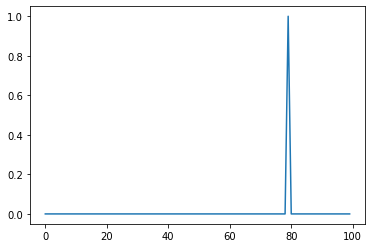

In [ ]:
import matplotlib.pyplot as plt
plt.plot(reward_training[0:100])

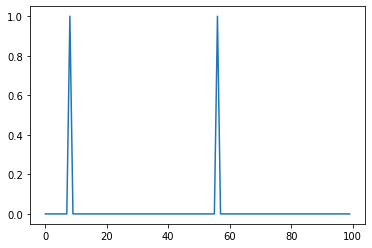

In [ ]:
lenreward = len(reward_training)
plt.plot(reward_training[lenreward-101:lenreward-1])

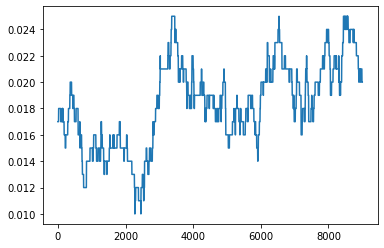

In [ ]:
import pandas as pd
import math
window_size = math.ceil(lenreward/10)
number_series = pd.Series(reward_training)
windows = number_series.rolling(window_size)
moving_averages = windows.mean()
moving_averages_list = moving_averages.tolist()
final_list = moving_averages_list[window_size-1:]
plt.plot(final_list)

In [ ]:
len(moving_averages_list)

10000

In [ ]:
Q_matrix

array([[0.02318561, 0.02252181, 0.02240986, 0.02064318],
       [0.01168749, 0.01345618, 0.01318431, 0.0208192 ],
       [0.02542258, 0.02155472, 0.02187157, 0.01559487],
       [0.00780828, 0.0091905 , 0.0058997 , 0.01336493],
       [0.02915722, 0.01925695, 0.01939608, 0.01547413],
       [0.        , 0.        , 0.        , 0.        ],
       [0.03468919, 0.03548799, 0.04355959, 0.00435894],
       [0.        , 0.        , 0.        , 0.        ],
       [0.01815985, 0.03234071, 0.02548075, 0.04392987],
       [0.03504574, 0.0796603 , 0.0561284 , 0.03630324],
       [0.10775316, 0.14254553, 0.10027267, 0.02026927],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.02992783, 0.10802538, 0.1223479 , 0.10975407],
       [0.1143457 , 0.44426995, 0.32607742, 0.31660173],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
np.max(Q_matrix[1, :])

0.020819196043757905

In [ ]:
populate_q_matrix(render=False) # Training

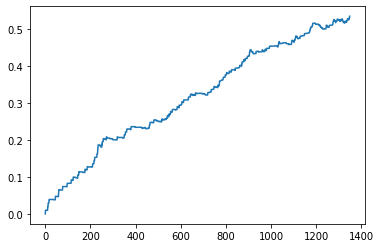

In [ ]:
plt.plot(Q_sa)